<a href="https://colab.research.google.com/github/saisumedha/FMML-PROJECTS_AND_LABS/blob/main/MODULE04_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
def f(x):
    return x ** 2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

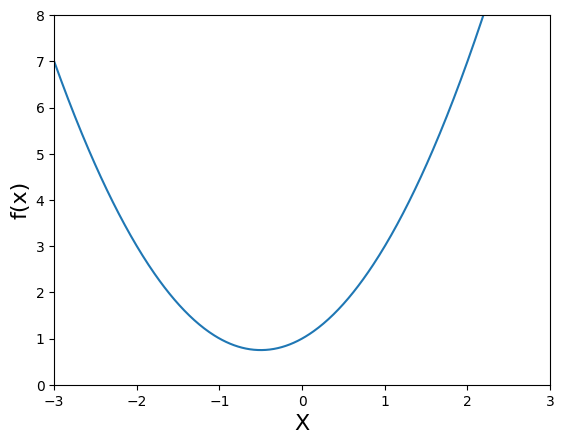

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

In [5]:
def df(x):
    return 2 * x + 1

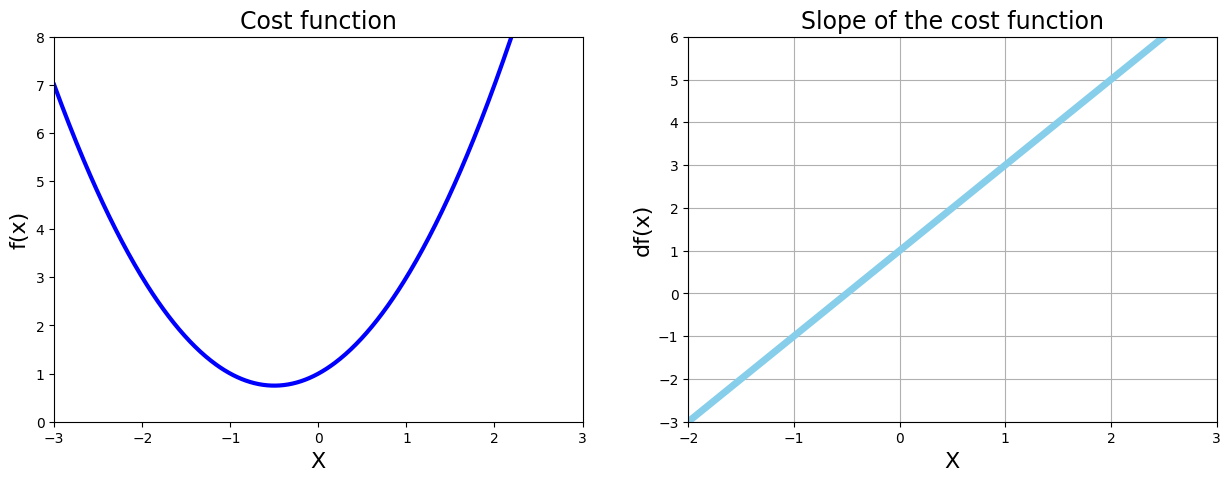

In [6]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

In [7]:
#TAK1
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # [REQUIRED]
    new_x = previous_x - step_multiplier * gradient  # [REQUIRED]

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))  # [REQUIRED]

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


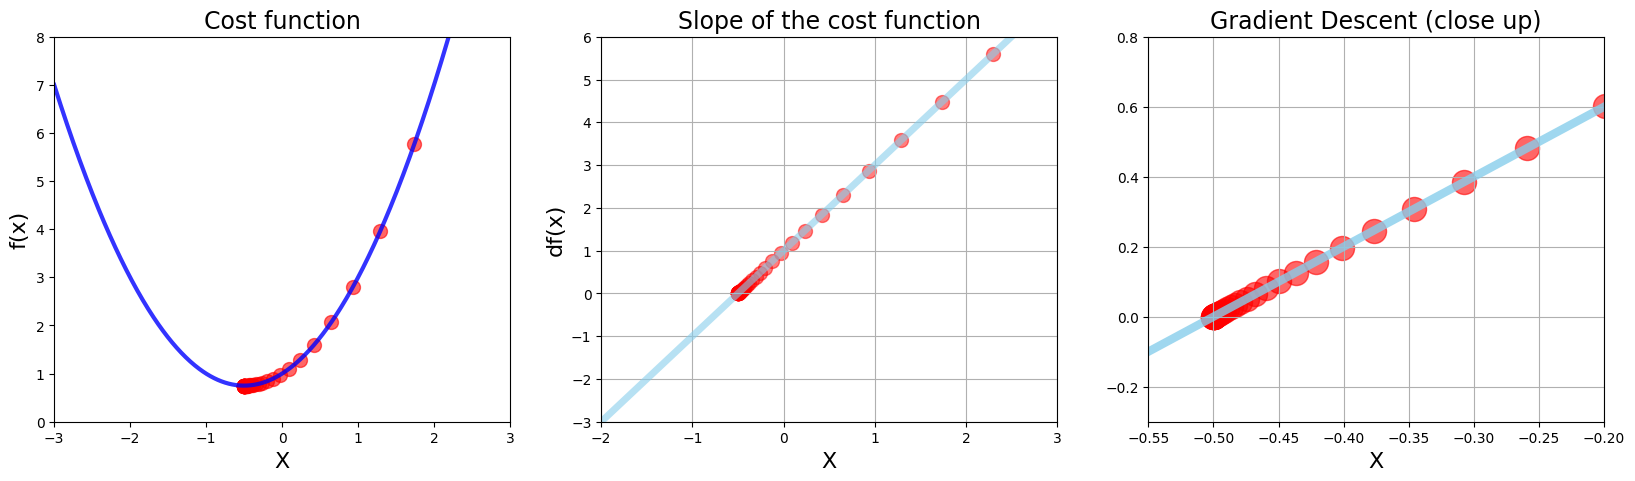

In [8]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

In [9]:
#TASK2
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return np.sin(x) + x / 2  # [REQUIRED]

def dg(x):
    return np.cos(x) + 0.5  # [REQUIRED]

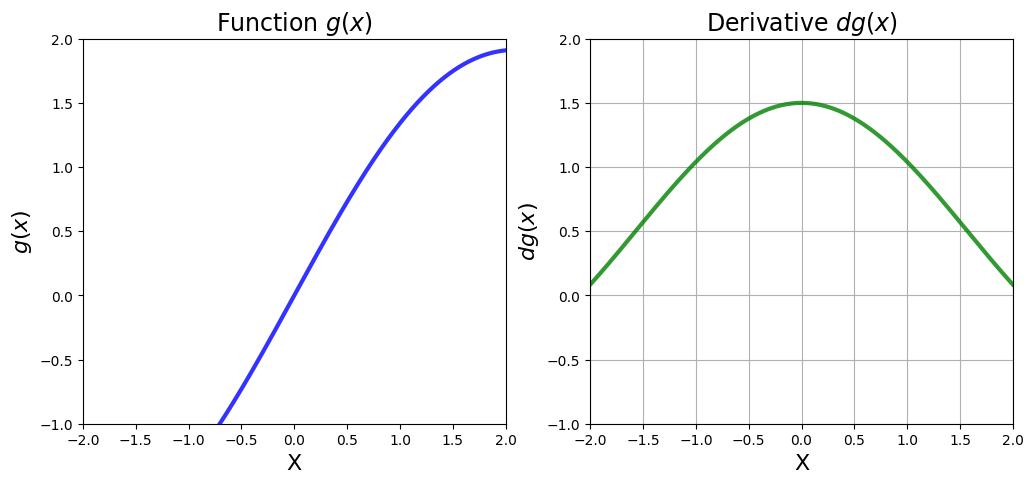

In [10]:
#TASK3
# Plotting function g(x) and its derivative dg(x) side by side

plt.figure(figsize=[12, 5])

# Chart 1: Function g(x)
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(-1, 2)

plt.title('Function $g(x)$', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('$g(x)$', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

# Chart 2: Derivative dg(x)
plt.subplot(1, 2, 2)

plt.title('Derivative $dg(x)$', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('$dg(x)$', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-1, 2)

plt.plot(x_2, dg(x_2), color='green', linewidth=3, alpha=0.8)

plt.show()


In [11]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [12]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -2.038870068516662
Number of steps: 216


In [13]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.997184328939013
Number of steps: 301


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -2.0393865637228323
Number of steps: 196


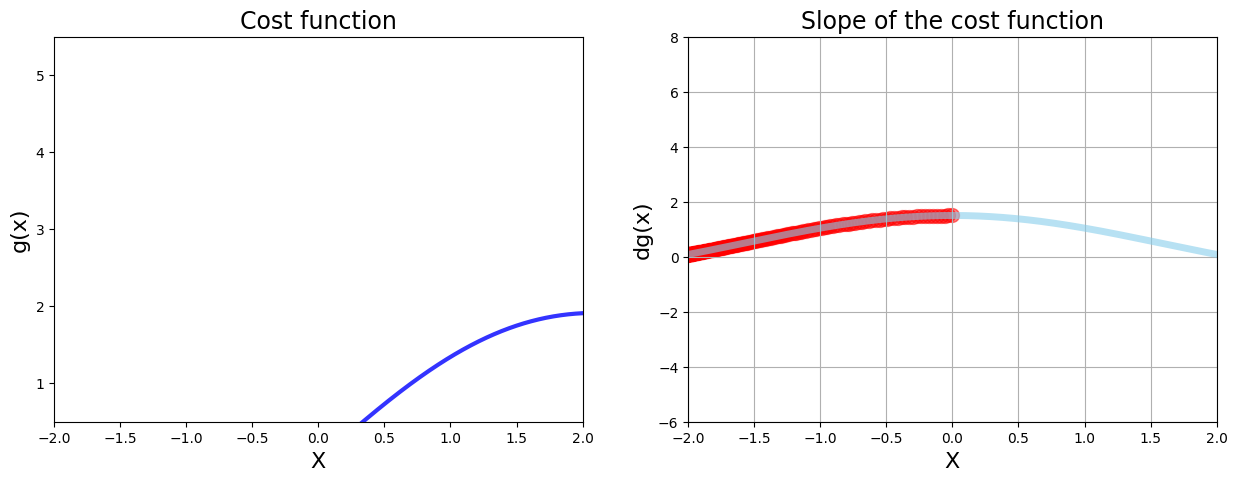

In [15]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

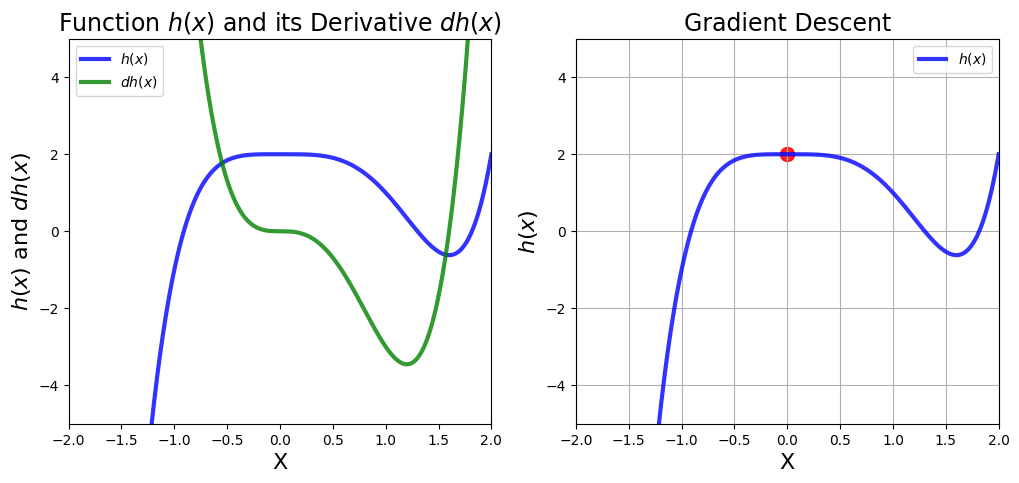

Local minimum occurs at: 0.0
Number of steps: 2


In [16]:
#TASK4
# Define the function h(x)
def h(x):
    return x**5 - 2*x**4 + 2

# Define the derivative of h(x)
def dh(x):
    return 5*x**4 - 8*x**3

# Make some data
x_3 = np.linspace(-2, 2, 1000)

# Plot function h(x) and its derivative dh(x)
plt.figure(figsize=[12, 5])

# Chart 1: Function h(x) and its derivative dh(x)
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(-5, 5)

plt.title('Function $h(x)$ and its Derivative $dh(x)$', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('$h(x)$ and $dh(x)$', fontsize=16)

plt.plot(x_3, h(x_3), label='$h(x)$', color='blue', linewidth=3, alpha=0.8)
plt.plot(x_3, dh(x_3), label='$dh(x)$', color='green', linewidth=3, alpha=0.8)

plt.legend()

# Chart 2: Gradient Descent
plt.subplot(1, 2, 2)

# Calling gradient descent function
local_min_h, list_x_h, deriv_list_h = gradient_descent(derivative_func=dh, initial_guess=0)

plt.title('Gradient Descent', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('$h(x)$', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-5, 5)

plt.plot(x_3, h(x_3), label='$h(x)$', color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x_h, h(np.array(list_x_h)), color='red', s=100, alpha=0.6)

plt.legend()

plt.show()

print('Local minimum occurs at:', local_min_h)
print('Number of steps:', len(list_x_h))

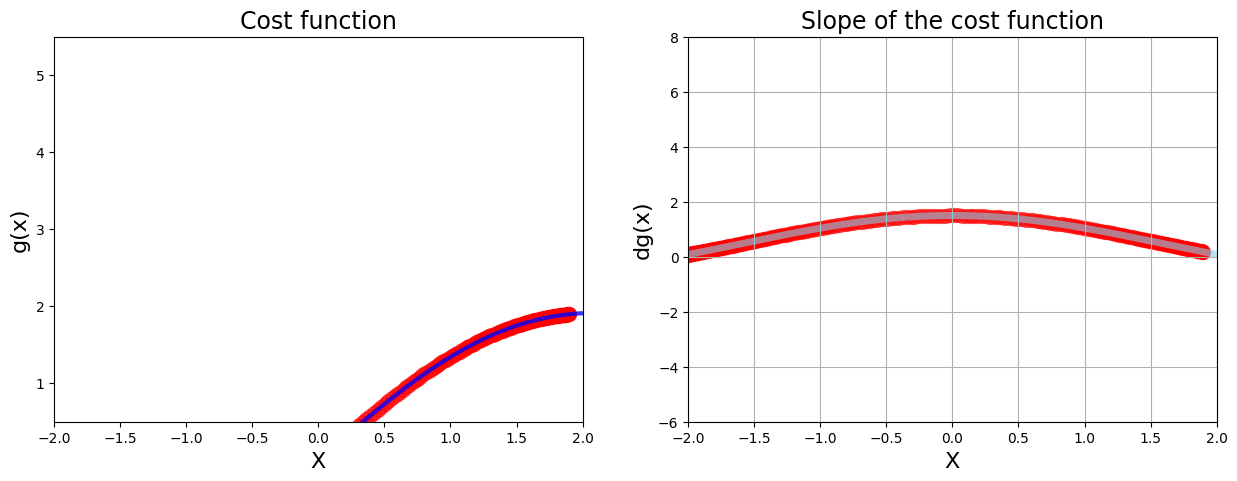

Number of steps is:  329


In [17]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

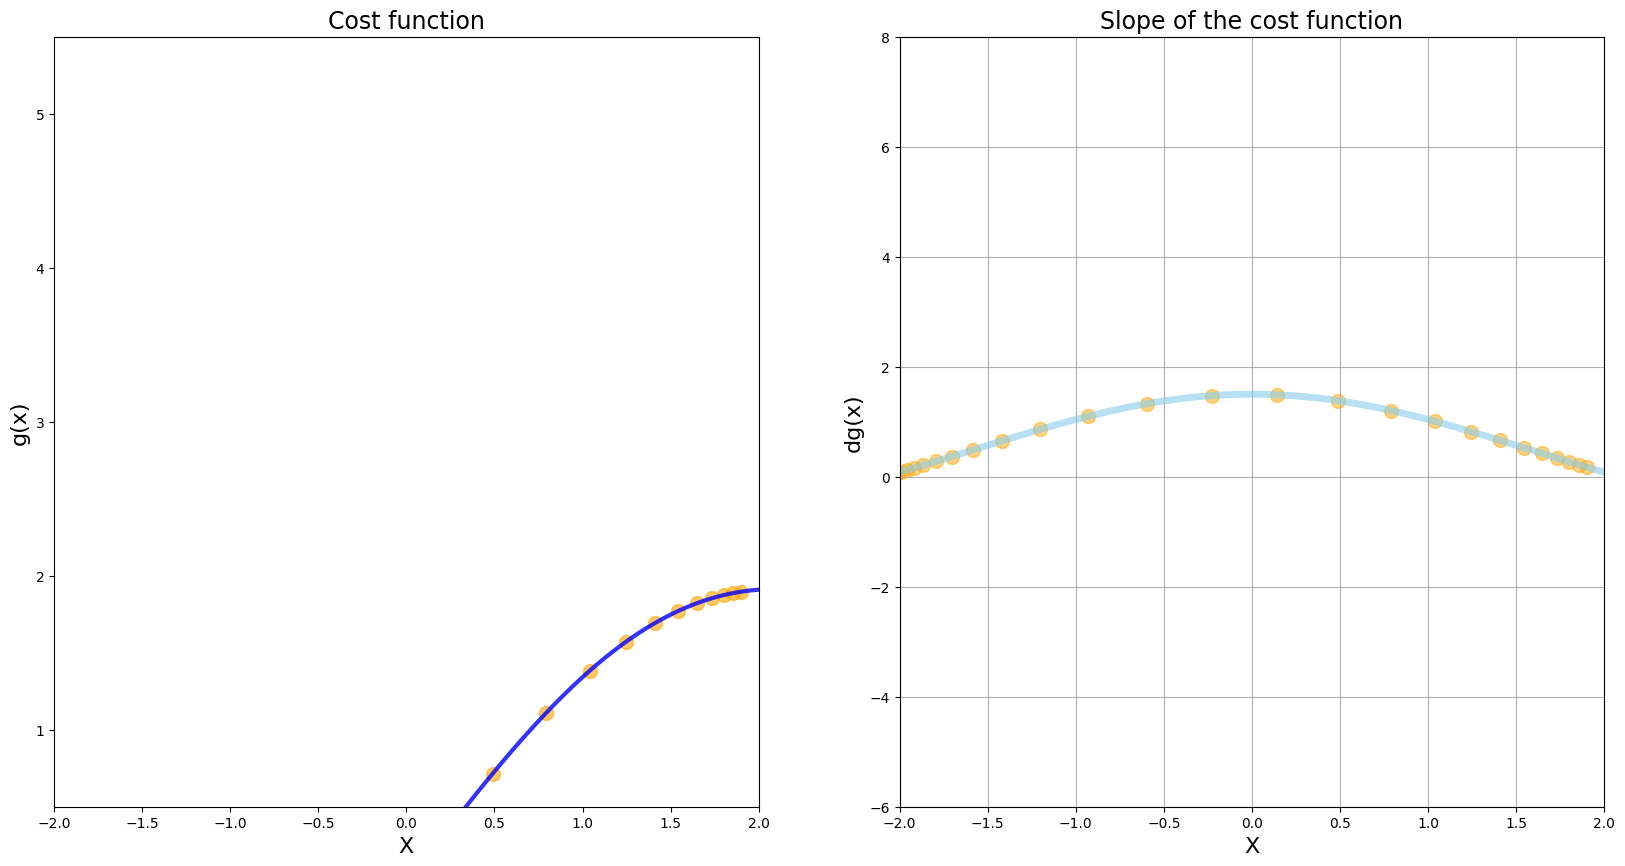

In [18]:
#TASK5,6
# TASK-5: Run gradient descent 3 times
# Calling gradient descent function for mid_gamma (0.001) and high_gamma (0.002)
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment with insane_gamma
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# TASK-6: Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
plt.figure(figsize=[20, 10])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

plt.scatter(low_gamma[1], g(np.array(low_gamma[1])), color='red', s=100, alpha=0.6)
plt.scatter(mid_gamma[1], g(np.array(mid_gamma[1])), color='green', s=100, alpha=0.6)
plt.scatter(high_gamma[1], g(np.array(high_gamma[1])), color='yellow', s=100, alpha=0.6)
plt.scatter(insane_gamma[1], g(np.array(insane_gamma[1])), color='orange', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)

plt.scatter(low_gamma[1], low_gamma[2], color='red', s=100, alpha=0.5)
plt.scatter(mid_gamma[1], mid_gamma[2], color='green', s=100, alpha=0.5)
plt.scatter(high_gamma[1], high_gamma[2], color='yellow', s=100, alpha=0.5)
plt.scatter(insane_gamma[1], insane_gamma[2], color='orange', s=100, alpha=0.5)

plt.show()


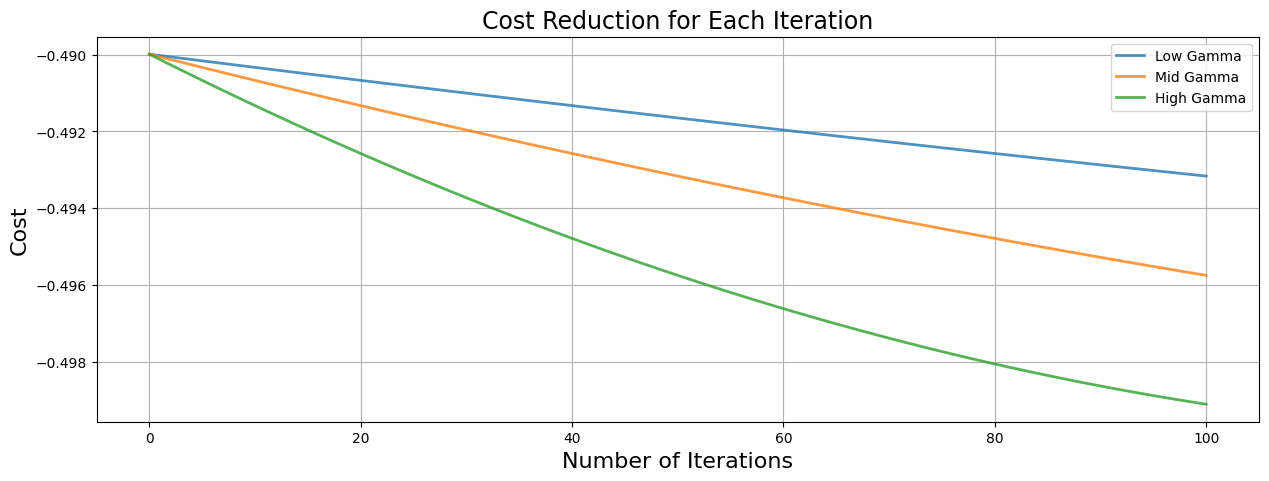

In [22]:
#TASK7
# TASK-7: Plot reduction in cost for each iteration

# Extracting data for plotting
low_gamma_cost = low_gamma[2]
mid_gamma_cost = mid_gamma[2]
high_gamma_cost = high_gamma[2]
insane_gamma_cost = insane_gamma[2]

# Trim the insane_gamma_cost array to match the length of iterations
iterations = list(range(len(low_gamma_cost)))
insane_gamma_cost = insane_gamma_cost[:len(iterations)]

# Plotting
plt.figure(figsize=[15, 5])

# 1 Chart: Cost reduction for each iteration
plt.subplot(1, 1, 1)

plt.title('Cost Reduction for Each Iteration', fontsize=17)
plt.xlabel('Number of Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)
plt.grid()

plt.plot(iterations, low_gamma_cost, label='Low Gamma', linewidth=2, alpha=0.8)
plt.plot(iterations, mid_gamma_cost, label='Mid Gamma', linewidth=2, alpha=0.8)
plt.plot(iterations, high_gamma_cost, label='High Gamma', linewidth=2, alpha=0.8)
plt.legend()

plt.show()



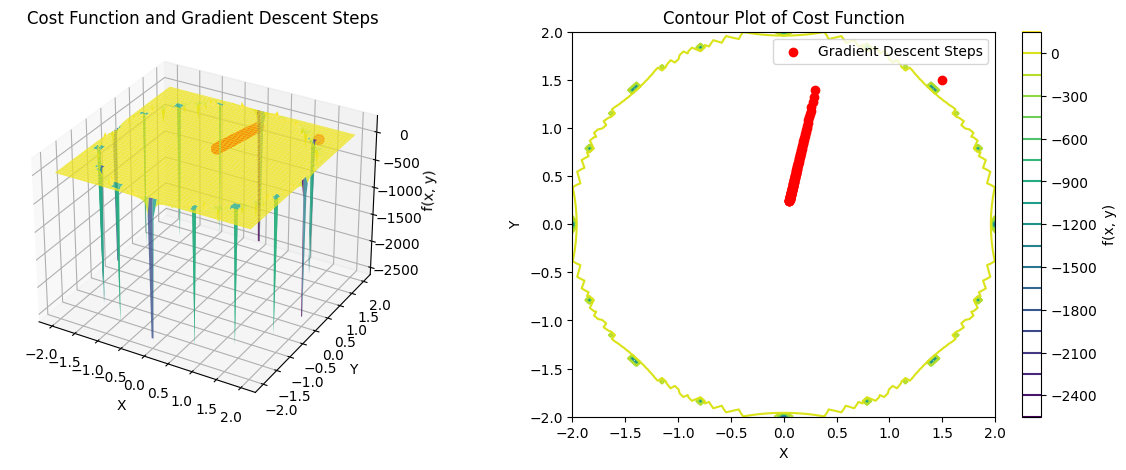

In [23]:
#TASK8
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

# Define the function and its derivative
def f(x, y):
    return 1 / (3 - x**2 - y**2 + 1)

def df_x(x, y):
    return 2 * x / (3 - x**2 - y**2 + 1)**2

def df_y(x, y):
    return 2 * y / (3 - x**2 - y**2 + 1)**2

def gradient_descent(x, y, learning_rate=0.01, precision=0.0001, max_iter=300):
    x_list = [x]
    y_list = [y]
    cost_list = [f(x, y)]

    for _ in range(max_iter):
        x = x - learning_rate * df_x(x, y)
        y = y - learning_rate * df_y(x, y)

        x_list.append(x)
        y_list.append(y)
        cost_list.append(f(x, y))

        if abs(cost_list[-1] - cost_list[-2]) < precision:
            break

    return x_list, y_list, cost_list

# Run gradient descent
initial_x, initial_y = 1.5, 1.5
learning_rate = 0.1
x_list, y_list, cost_list = gradient_descent(initial_x, initial_y, learning_rate)

# Plot the results
fig = plt.figure(figsize=(15, 5))

# Surface plot for the cost function
ax1 = fig.add_subplot(121, projection='3d')
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)
ax1.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8)
ax1.scatter(x_list, y_list, cost_list, color='red', s=50, label='Gradient Descent Steps')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('Cost Function and Gradient Descent Steps')

# Contour plot for the cost function
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=20, cmap=cm.viridis)
ax2.scatter(x_list, y_list, color='red', label='Gradient Descent Steps')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Contour Plot of Cost Function')
plt.colorbar(contour, ax=ax2, label='f(x, y)')

plt.legend()
plt.show()

In [24]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


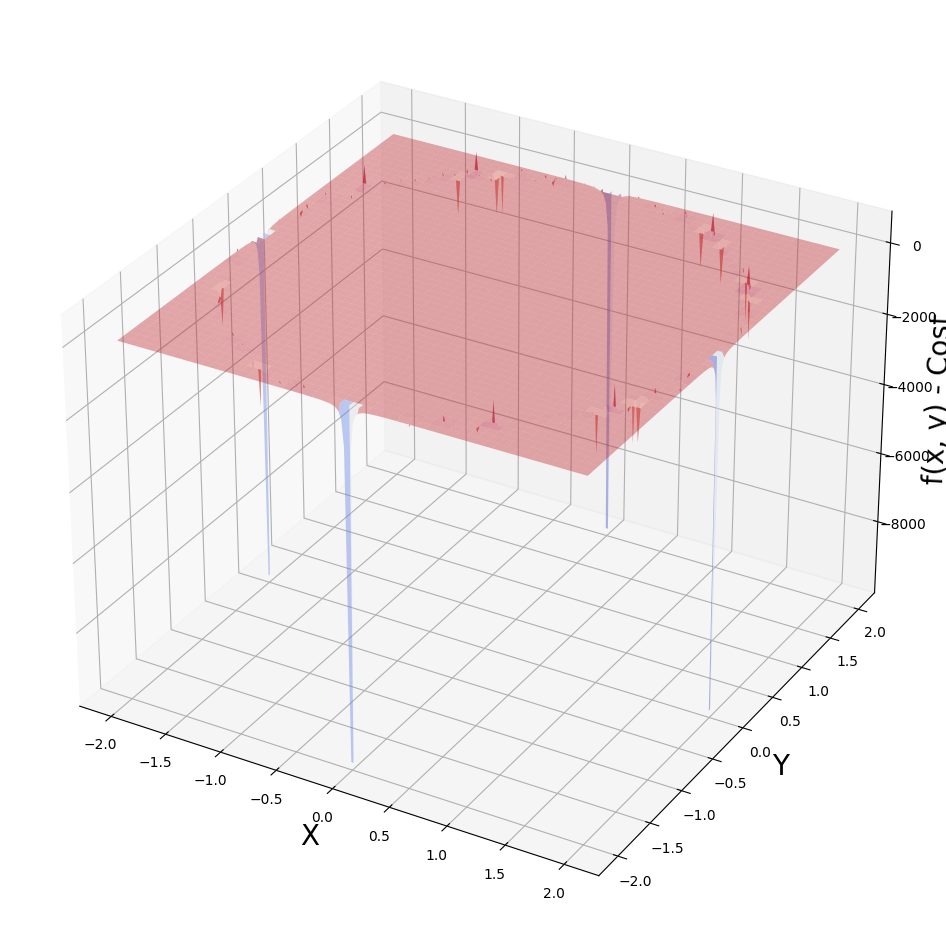

In [25]:
# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

In [26]:
#TASK9
from sympy import symbols, diff

# Define symbols
x, y = symbols('x y')

# Define the function f(x, y)
f = 1 / (3 - x**2 - y**2) + 1

# Calculate partial derivatives
df_dx = diff(f, x)
df_dy = diff(f, y)

# Print the results
print("Partial Derivative with respect to x:")
print(df_dx)

print("\nPartial Derivative with respect to y:")
print(df_dy)


Partial Derivative with respect to x:
2*x/(-x**2 - y**2 + 3)**2

Partial Derivative with respect to y:
2*y/(-x**2 - y**2 + 3)**2


In [28]:
from sympy import symbols, diff

# Redefine the cost function with a different variable name
def cost_function(x, y):
    return 1 / (3 - x**2 - y**2 + 1)

# Define symbols
a, b = symbols('x y')

print('Our cost function f(x, y) is: ', cost_function(a, b))
print('Partial derivative wrt x is: ', diff(cost_function(a, b), a))
print('Partial derivative wrt y is: ', diff(cost_function(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      cost_function(a, b).evalf(subs={a: 1.8, b: 1.0}))  # Python Dictionary
print('Value of partial derivative wrt x: ',
      diff(cost_function(a, b), a).evalf(subs={a: 1.8, b: 1.0}))


Our cost function f(x, y) is:  1/(-x**2 - y**2 + 4)
Partial derivative wrt x is:  2*x/(-x**2 - y**2 + 4)**2
Partial derivative wrt y is:  2*y/(-x**2 - y**2 + 4)**2
Value of f(x,y) at x=1.8 y=1.0 is:  -4.16666666666666
Value of partial derivative wrt x:  62.4999999999999


In [30]:
# Redefine the cost function with a different name
def cost_function(x, y):
    return 1 / (3 - x**2 - y**2 + 1)

# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guess

for n in range(max_iter):
    gradient_x = diff(cost_function(a, b), a).evalf(subs={a: params[0], b: params[1]})
    gradient_y = diff(cost_function(a, b), b).evalf(subs={a: params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', cost_function(params[0], params[1]))


Values in gradient array [0.0774079397932183 0.0430044109962325]
Minimum occurs at x value of:  0.508314391458292
Minimum occurs at y value of:  0.282396884143496
The cost is:  0.273084630336428


In [31]:
#TASK10
# Partial derivative functions example 4
def fpx(x, y):
    return -2 * x / (3 - x**2 - y**2 + 1)**2

def fpy(x, y):
    return -2 * y / (3 - x**2 - y**2 + 1)**2


In [33]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array [-0.00235207 -0.00130671]
Minimum occurs at x value of:  8.17015479443108
Minimum occurs at y value of:  4.5389748857950565


TypeError: ignored

In [35]:
# Original cost function
def f(x, y):
    return 1 / (3 - x**2 - y**2 + 1)

# Updated cost function
def cost_function(x, y):
    return 1 / (3 - x**2 - y**2 + 1)

# Partial derivative functions example 4
def fpx(x, y):
    return -2 * x / ((3 - x**2 - y**2 + 1)**2)

def fpy(x, y):
    return -2 * y / ((3 - x**2 - y**2 + 1)**2)

# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0])  # initial guess
values_list = [params]

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_list.append(params)

# Convert the list to an array
values_array = np.array(values_list)

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', cost_function(params[0], params[1]))


Values in gradient array [-0.00241909 -0.00134394]
Minimum occurs at x value of:  8.098601781645009
Minimum occurs at y value of:  4.499223212025013
The cost is:  -0.012220403233909312


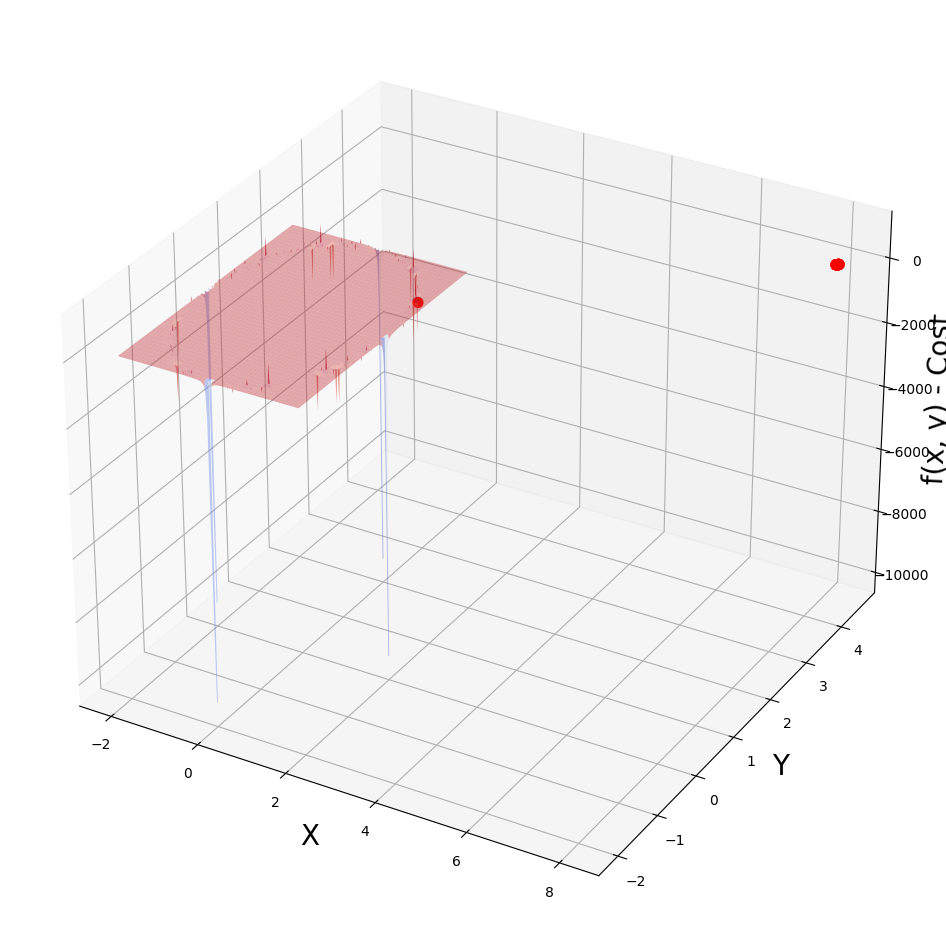

In [36]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()